<a href="https://colab.research.google.com/github/Jum-eng/Heart-Disease-Classification-with-CNN/blob/main/Heart_Disease_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow
!pip install keras

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

def ignore_warnings(*args, **kwargs):
    pass
warnings.warn = ignore_warnings



In [8]:
df = pd.read_csv('/content/Heart_disease_cleveland_new.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [12]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


,proportion
target,
0,0.541254
1,0.458746


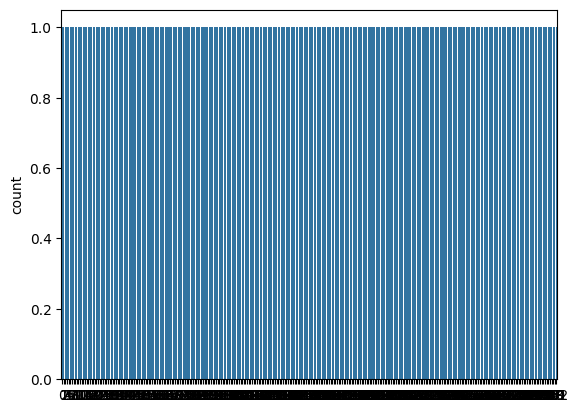

In [13]:
sns.countplot(df.target)
plt.show
df.target.value_counts(normalize=True)

<Axes: xlabel='sex'>

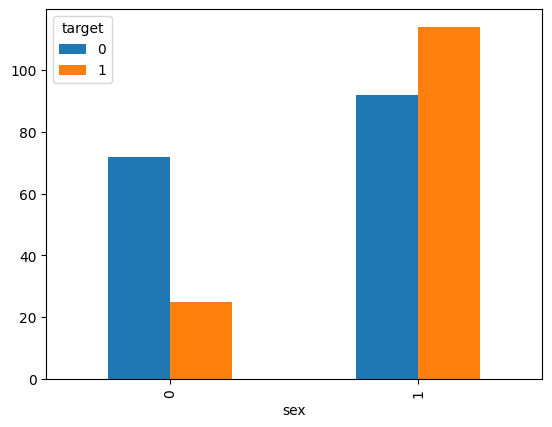

In [14]:
pd.crosstab(df.sex, df.target).plot(kind='bar')

<Axes: >

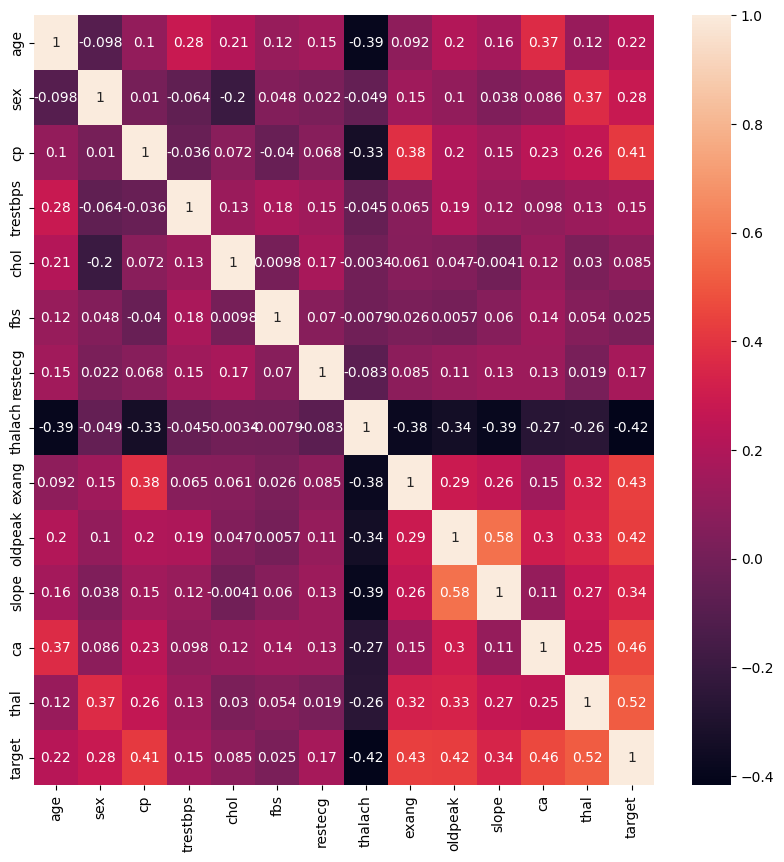

In [15]:
plt.figure(figsize=(10, 10), dpi = 100)
sns.heatmap(df.corr(), annot=True)

In [16]:
X = df.drop('target', axis=1).values
y = df['target'].values

#80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train.shape

(242, 13)

In [18]:
y_train.shape

(242,)

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train.shape


(242, 13, 1)

In [21]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_test.shape

(61, 13, 1)

In [22]:
y_train = y_train.reshape(y_train.shape[0], 1)
y_train.shape

(242, 1)

In [23]:
y_test = y_test.reshape(y_test.shape[0], 1)
y_test.shape

(61, 1)

In [29]:
cnn = Sequential()
cnn.add(Conv1D(64, 3, padding = "same", activation='relu', input_shape=(13, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation='sigmoid'))

print(cnn.summary())


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 13, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,665 (194.00 KB)

 Trainable params: 49,665 (194.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [30]:
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
history_cnn = cnn.fit(x=X_train, y=y_train,
                      validation_data=(X_test, y_test),
                      epochs=50,
                      callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9772 - loss: 0.0991 - val_accuracy: 0.8525 - val_loss: 0.3607
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9561 - loss: 0.0959 - val_accuracy: 0.8525 - val_loss: 0.3844
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9684 - loss: 0.1148 - val_accuracy: 0.8525 - val_loss: 0.3828
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9705 - loss: 0.0989 - val_accuracy: 0.8689 - val_loss: 0.3638


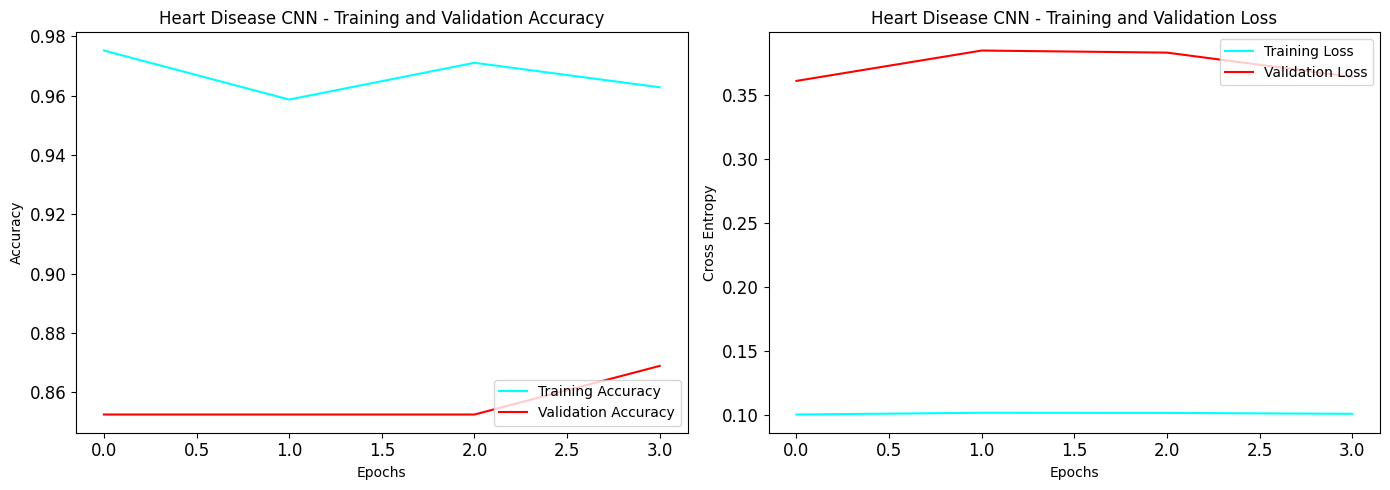

In [48]:
import matplotlib.pyplot as plt

acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']

loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

plt.figure(figsize=(14, 5))  # Wider for side-by-side plots

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy', color='cyan')
plt.plot(val_acc, label='Validation Accuracy', color='red')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Heart Disease CNN - Training and Validation Accuracy')
plt.xlabel('Epochs')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss', color='cyan')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Heart Disease CNN - Training and Validation Loss')
plt.xlabel('Epochs')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



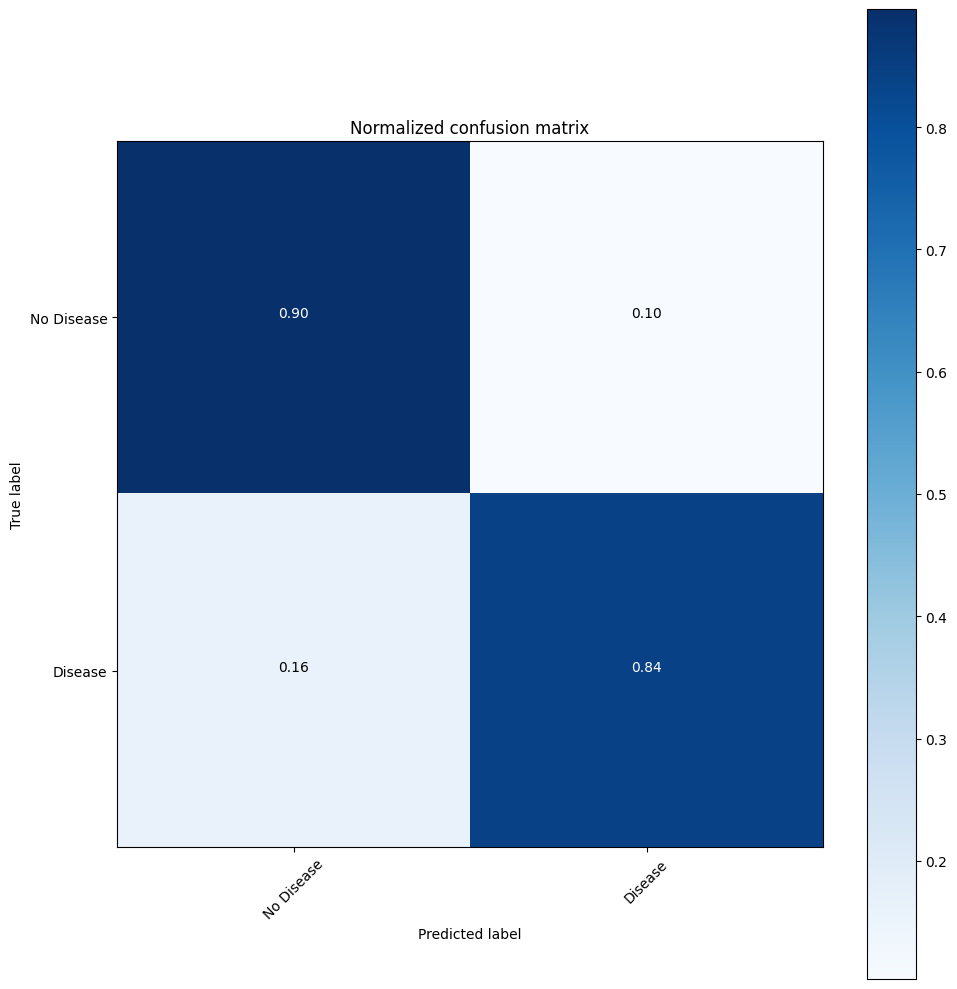

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=45)
      plt.yticks(tick_marks, classes)

      fmt = '.2f' if normalize else 'd'
      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label')


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# #plot non-normalizeed confusion
# plt.figure(figsize=(10,10))
# plot_confusion_matrix(cm, classes=['No Disease', 'Disease'],
#                       title='Confusion matrix, without normalization')

#plot non normalized confusion
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=['No Disease', 'Disease'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
